# Exercise 02: Vortex dynamics

> Interactive online tutorial:
> [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/ubermag/oommfc/master?filepath=docs%2Fipynb%2Findex.ipynb)

We want to simulate vortex dynamics in a two-dimensional disk sample with $d=100 \,\text{nm}$ diameter and $5\,\text{nm}$ thickness with:

- magnetisation saturation $M_\text{s} = 8 \times 10^{5} \,\text{A}\,\text{m}^{-1}$,
- exchange energy constant $A = 13 \,\text{pJ}\,\text{m}^{-1}$,
- gyrotropic ratio $\gamma = 2.211 \times 10^{5} \,\text{m}\,\text{A}^{-1}\,\text{s}^{-1}$, and
- Gilbert damping $\alpha=0.2$.

Please carry out the following steps:

1. Initialise the system so that $(m_{x}, m_{y}, m_{z}) = (-Ay, Ax, 10)$, where $A = 10^{9}\,\text{m}^{-1}$.
2. Minimise the system's energy. What state did you obtain?
3. Apply an external magnetic field of $H = 10^{4} \,\text{A}\,\text{m}^{-1}$ in the positive $x$ direction and relax the system. Did the vortex core move in the positive $y$ direction?
4. Turn off an external magnetic field and simulate the vortex dynamics for $t = 5 \,\text{ns}$ and save magnetisation in $n = 500$ steps. Plot all three components of magnetisation as a function of time.

## Solution

In [1]:
import discretisedfield as df
import oommfc as oc
%matplotlib inline

# Geometry
d = 100e-9  # disk diameter (m)
thickness = dx = dy = dz = 5e-9  #discretisation cell (nm)

# Material (permalloy) parameters
Ms = 8e5  # saturation magnetisation (A/m)
A = 13e-12  # exchange energy constant (J/m)

# Dynamics (LLG equation) parameters
gamma = 2.211e5  # gyromagnetic ratio (m/As)
alpha = 0.2  # Gilbert damping

mesh = oc.Mesh(p1=(-d/2, -d/2, 0), p2=(d/2, d/2, thickness), cell=(dx, dy, dz))

def Ms_fun(pos):
    x, y, z = pos
    if (x**2 + y**2)**0.5 < d/2:
        return Ms
    else:
        return 0
    
def m_init(pos):
    x, y, z = pos
    A = 1e9  # (1/m)
    return -A*y, A*x, 10

system = oc.System(name='vortex_dynamics')
system.hamiltonian = oc.Exchange(A=A) + oc.Demag()
system.dynamics = oc.Precession(gamma=gamma) + oc.Damping(alpha=alpha)
system.m = df.Field(mesh, value=m_init, norm=Ms_fun)

md = oc.MinDriver()
md.drive(system)

system.m.k3d_vectors(color_field=system.m.z, head_size=10)

2019/11/12 14:30: Running OOMMF (vortex_dynamics.mif) ... (0.9 s)


Output()

In [2]:
H = (1e4, 0, 0)
system.hamiltonian += oc.Zeeman(H=H)

md.drive(system)
system.m.k3d_vectors(color_field=system.m.z, head_size=10)

2019/11/12 14:30: Running OOMMF (vortex_dynamics.mif) ... (1.3 s)


Output()

2019/11/12 14:30: Running OOMMF (vortex_dynamics.mif) ... (7.0 s)


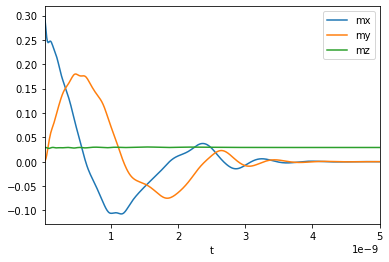

In [3]:
system.hamiltonian.zeeman.H = (0, 0, 0)

td = oc.TimeDriver()
td.drive(system, t=5e-9, n=500)

system.dt.plot('t', ['mx', 'my', 'mz'])

In [4]:
system.delete()

## Other

More details on various functionality can be found in the [API Reference](https://oommfc.readthedocs.io/en/latest/).